In [1]:
from PIL import Image as imgg
from imageio import imread
import imageio
from matplotlib import pyplot as plt
import io
import matplotlib.gridspec as gridspec
import numpy as np

In [6]:
imge = imageio.mimread('000801ac_3500002379_100X_20181005_3-Scene-26-aligned_cropped-P85-G07.ome.tiff' ,memtest="500MB")

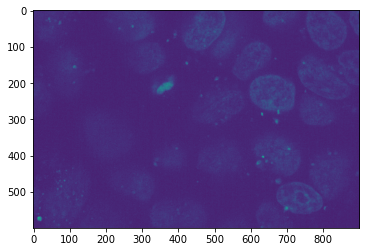

In [90]:
plt.imshow(imge[187])

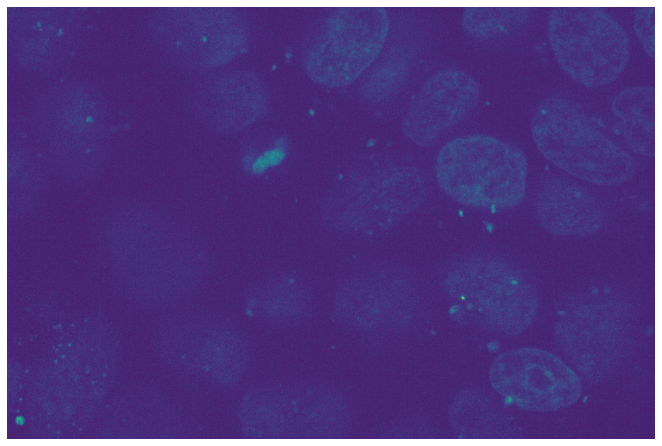

In [91]:
fig = plt.figure(frameon=False)
fig.set_size_inches(imge[187].shape[1]/100,imge[187].shape[0]/100)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
ax.imshow(imge[187], aspect='auto')
buf = io.BytesIO()
fig.savefig(buf, format='png')
buf.seek(0)
im = imgg.open(buf)
im.save(f"./aics/experiment2/16.png")
buf.close()

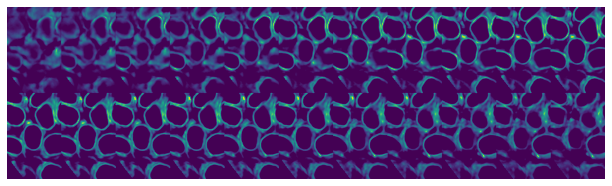

In [39]:
imge=imageio.mimread("https://allencell.s3.amazonaws.com/aics/label-free-imaging-collection/cells_3d/fov-1003_CellIndex-9.tiff",memtest="500MB")
g=imge[740]
i=1
bol=0
for k in range (2):
    if bol==1:
        g=imge[740+i]
        i+=1
    for j in range(10):
        g=np.concatenate((g,imge[740+i]),axis=1)
        i+=1
    if bol==0:
        s=g
        bol=1
    else:
        s=np.concatenate((s,g),axis=0)
fig=plt.figure()
fig.set_size_inches((s.shape[1]/100),(s.shape[0]/100))
plt.imshow(s)
plt.axis("off")
buf = io.BytesIO()
fig.savefig(buf, format='png')
buf.seek(0)
im = imgg.open(buf)
im.save(f"./aics/merged20.png")
buf.close()

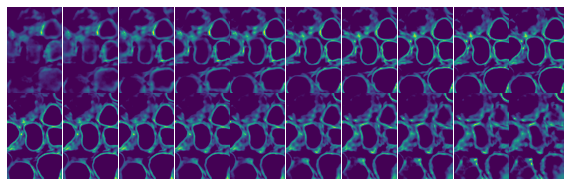

In [13]:
fig=plt.figure()
fig.set_size_inches((imge[740].shape[1]/100)*10,(imge[740].shape[0]/100)*2)
gs1 = gridspec.GridSpec(2, 10)
gs1.update(wspace=0, hspace=0)
j=740
for i in range(20):
#     fig.add_subplot(2, 10, i+1)
    fig.add_subplot(gs1[i])
    plt.imshow(imge[740+i])
    plt.Axes(fig, [0., 0., 1., 1.])
    plt.axis("off")
buf = io.BytesIO()
fig.savefig(buf, format='png')
buf.seek(0)
im = imgg.open(buf)
im.save("merged.png")
buf.close()